In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd

df = pd.read_csv("dataset/satisfaction.csv", na_filter=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   id                                 129880 non-null  int64 
 1   satisfaction_v2                    129880 non-null  object
 2   Gender                             129880 non-null  object
 3   Customer Type                      129880 non-null  object
 4   Age                                129880 non-null  int64 
 5   Type of Travel                     129880 non-null  object
 6   Class                              129880 non-null  object
 7   Flight Distance                    129880 non-null  int64 
 8   Seat comfort                       129880 non-null  int64 
 9   Departure/Arrival time convenient  129880 non-null  int64 
 10  Food and drink                     129880 non-null  int64 
 11  Gate location                      129880 non-null  

In [3]:
# Data preprocess.
df.rename(columns = {'id': 'id', 'satisfaction_v2': 'satisfaction', "Gender":"Gender", "Customer Type":"Customer_Type",
                          "Age":"Age", "Type of Travel":"Type_of_Travel", "Class":"Class", "Flight Distance":"Flight_Distance",
                           "Seat comfort":"Seat_comfort", "Departure/Arrival time convenien":"Departure/Arrival_time_convenien", "Food and drink":"Food_and_drink", "Gate location":"Gate_location",
                          "Inflight wifi service":"Inflight_wifi_service", "Inflight entertainment":"Inflight_entertainment","Online support":"Online_support","Ease of Online booking":"Ease_of_Online_booking",
                     "On-board service":"On-board_service", "Leg room service":"Leg_room_service","Baggage handling":"Baggage_handling","Checkin service":"Checkin_service","Cleanliness":"Cleanliness",
                     "Online boarding":"Online_boarding","Departure Delay in Minutes":"Departure_Delay_in_Minutes", "Arrival Delay in Minutes":"Arrival_Delay_in_Minutes"}, inplace = True)

df.drop(["id", "Arrival_Delay_in_Minutes", "Ease_of_Online_booking", "Online_support"],inplace= True,  axis=1)
# Map ordinal categorical column.
satisfaction_map = {"neutral or dissatisfied":0, "satisfied":1}
df["satisfaction"] = df["satisfaction"].map(satisfaction_map)

# One hot encoding non ordinal categorical data.
df = pd.get_dummies(df, columns = ['Gender', 'Customer_Type', 'Type_of_Travel','Class'])
#enc = OneHotEncoder()
#df = enc.fit_transform(df['Gender', 'Customer_Type', 'Type_of_Travel','Class', np.newaxis]).toarray()

# Split target variable, we want to predict satisfcation.
class_var ="satisfaction"
X = df.drop(class_var, axis=1) 
y = df[class_var]
y.value_counts()

X_mat = X.to_numpy()

In [4]:
# Split to train, test data.
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, accuracy_score

# Build our decision tree.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
print("Train accuracy:", model.score(X_train, y_train))  # Training accuracy is very high, almost 100%
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.932886767272354


In [7]:
y_pred = model.predict(X_test)  # Take a look at F1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17638
           1       0.94      0.94      0.94     21326

    accuracy                           0.93     38964
   macro avg       0.93      0.93      0.93     38964
weighted avg       0.93      0.93      0.93     38964



In [8]:
from sklearn import tree  # How many nodes we have in this tree

treeObj = model.tree_
print(treeObj.node_count)

9007


In [9]:
import numpy as np

# Take a look at our feature importances
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

Inflight_entertainment : 0.39489411427959803
Seat_comfort : 0.17837731464017664
Age : 0.04475998532938822
On-board_service : 0.03854839237152948
Flight_Distance : 0.03516542966584114
Gate_location : 0.030137087743321803
Customer_Type_Loyal Customer : 0.02526156365311085
Leg_room_service : 0.02451883597521242
Class_Business : 0.024318033428736844
Online_boarding : 0.024246779243059634
Departure/Arrival time convenient : 0.022076847882879717
Checkin_service : 0.022045349122963676
Baggage_handling : 0.01910037010786649
Departure_Delay_in_Minutes : 0.018946483803734083
Cleanliness : 0.01748968055026442
Gender_Female : 0.016570937220416398
Type_of_Travel_Personal Travel : 0.01614280521716373
Food_and_drink : 0.01242742853200956
Type_of_Travel_Business travel : 0.012390178976260907
Inflight_wifi_service : 0.009697993883153594
Customer_Type_disloyal Customer : 0.006891704256961892
Gender_Male : 0.003631056256256561
Class_Eco : 0.0016004225093602792
Class_Eco Plus : 0.0007612053507335465


In [10]:
from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to find optimal hyperparameters for our final decision tree
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=42),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

result_set = cv_1.cv_results_
print(result_set)

{'mean_fit_time': array([0.04827304, 0.05947366, 0.05885115, 0.05447879, 0.08256907,
       0.09662499, 0.08643122, 0.07610893, 0.12358501, 0.10772452,
       0.12229342, 0.11757896, 0.14615772, 0.14569645, 0.15461712,
       0.14496021, 0.18838596, 0.18877745, 0.18223414, 0.1934824 ,
       0.20097888, 0.19682875, 0.20906749, 0.20190961, 0.2223114 ,
       0.22546899, 0.2234319 , 0.23808119, 0.25421975, 0.2485378 ,
       0.2460557 , 0.24738102, 0.26376741, 0.26577716, 0.26100433,
       0.2614125 , 0.28675292, 0.28242102, 0.28113141, 0.28104327,
       0.29747834, 0.2998059 , 0.29467216, 0.28715632, 0.31666124,
       0.31353307, 0.31064861, 0.31210639, 0.32610469, 0.31563439,
       0.31384785, 0.31143308, 0.32938902, 0.32971017, 0.32533484,
       0.31675413, 0.33622811, 0.32546303, 0.32325449, 0.32767603,
       0.05813818, 0.05760102, 0.04853001, 0.04576869, 0.0943969 ,
       0.09191504, 0.0806093 , 0.09571371, 0.11590483, 0.11818531,
       0.12615325, 0.11060896, 0.15912127, 0

In [11]:
import matplotlib.pyplot as plt  

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  120


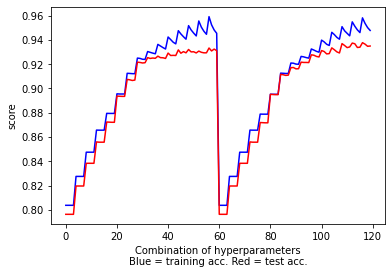

In [12]:
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

In [13]:
print(cv_1.best_params_)  # Here is the optimal hyperparameter

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5}


In [14]:
cv_1.fit(X_train, y_train)  # Model accuracy with optimal hyperparameter

print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.9576092216991509
Test accuracy: 0.9415357766143106


In [15]:
# Retrain with optimal hyperparameter

model_small = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=42, min_samples_leaf=5)
model_small.fit(X_train, y_train)

print("Train accuracy:", model_small.score(X_train, y_train))
print("Test accuracy:", model_small.score(X_test, y_test))

y_pred = model_small.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.9589071230586476
Test accuracy: 0.9398675700646751
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     17638
           1       0.95      0.94      0.94     21326

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964



In [16]:
import numpy as np

# Take a look at our feature importances
importances = model_small.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

for i in indices:
    print(feature_names[i], ':', importances[i])

Inflight_entertainment : 0.4443312966039116
Seat_comfort : 0.19767009097684932
On-board_service : 0.039011806079272425
Age : 0.03209319942082744
Gate_location : 0.02777651796171092
Class_Business : 0.0267077771276679
Customer_Type_Loyal Customer : 0.021919112451763152
Online_boarding : 0.02182238171570628
Leg_room_service : 0.021188319154953957
Departure/Arrival time convenient : 0.01979734747242923
Type_of_Travel_Business travel : 0.01867779256600632
Checkin_service : 0.018376528373415763
Baggage_handling : 0.014392794712538029
Gender_Female : 0.013595793291767223
Customer_Type_disloyal Customer : 0.012887747843487783
Cleanliness : 0.011512806047285822
Flight_Distance : 0.011385918479015576
Type_of_Travel_Personal Travel : 0.011181628804322304
Food_and_drink : 0.010978433465857529
Departure_Delay_in_Minutes : 0.010845357555375681
Gender_Male : 0.006773350459331736
Inflight_wifi_service : 0.006504847050472371
Class_Eco : 0.0005437963986121852
Class_Eco Plus : 2.5355987419511428e-05


In [17]:
treeObj = model_small.tree_  # # How many nodes we have in this tree 
print(treeObj.node_count)

2913


In [24]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install --user  git+https://github.com/nlhepler/pydot.git

  Cloning https://github.com/nlhepler/pydot.git to /private/var/folders/w9/4jh5bnlj0_7c437pxnkkyn9c0000gn/T/pip-req-build-rc26gni_
  Running command git clone --filter=blob:none --quiet https://github.com/nlhepler/pydot.git /private/var/folders/w9/4jh5bnlj0_7c437pxnkkyn9c0000gn/T/pip-req-build-rc26gni_
  Resolved https://github.com/nlhepler/pydot.git to commit adf18a858a63b321b7e4ffd964a24d73add1bf4f
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [27]:
conda install graphviz

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::_anaconda_depends==2020.07=py38_0
  - defaults/osx-64::anaconda==custom=py38_1
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done
Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::_anaconda_depends==2020.07=py38_0
  - defaults/osx-64::anaconda==custom=py38_1
done

## Package Plan ##

  environment location: /Users/chakhochan/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py38hecd8cb5_0         906 KB
    scikit-learn-0.24.2        |   py38hb2f4e1b_0         4.9 MB
    ---

In [55]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# Visualize the decision tree 
dotfile = StringIO()
export_graphviz(model_small, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph.write_png("dt_viz.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.281378 to fit



True

In [18]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on satisfaction (0 = dissatisfied, 1 = satisfied). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 20
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on satisfaction (0 = dissatisfied, 1 = satisfied). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.0 	 1.0 	 1
1.0 	 0.0 	 0
1.0 	 0.0 	 0
0.0 	 1.0 	 1
1.0 	 0.0 	 0
1.0 	 0.0 	 0
1.0 	 0.0 	 0
0.0 	 1.0 	 1
0.2 	 0.8 	 1
0.9777183600713012 	 0.022281639928698752 	 0
1.0 	 0.0 	 0
1.0 	 0.0 	 0
0.5346534653465347 	 0.46534653465346537 	 0
1.0 	 0.0 	 0
0.625 	 0.375 	 0
0.0 	 1.0 	 1
0.0 	 1.0 	 1
1.0 	 0.0 	 0
0.0 	 1.0 	 1
0.0 	 1.0 	 1


In [19]:
from sklearn.metrics import roc_auc_score  # Count our ROC accuracy

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.9322678152940166
ROC index on test for DT_optimal: 0.9805737376428556


In [20]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

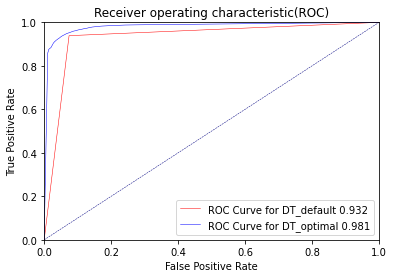

In [21]:
import matplotlib.pyplot as plt  # Visualize the ROC/AUC curve

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [22]:
#saving the result
import pickle
dt_best = cv_1
with open('DT.pickle', 'wb') as f:
    pickle.dump([dt_best], f)